### Extracting SMT2 model parameter estimates from MSDKI

As showed in [NetoHe2019](https://pubmed.ncbi.nlm.nih.gov/30648753/), MSDKI captures the same information than the spherical mean technique (SMT) microstructural models [Kaden2016b](https://pubmed.ncbi.nlm.nih.gov/27282476/). In this way, the SMT model parameters can be directly computed from MSDKI.

In this tutorial, we show how one can estimate the axonal volume fraction (f), the intrisic diffusivity (di), and the microscopic anisotropy of the SMT 2-compartmental model from the MSDKI ([NetoHe2019](https://pubmed.ncbi.nlm.nih.gov/30648753/)). 

So the first thing to do is to run again the MSDKI model. Below let's fit the MSDKI model to the CFIN's data (same code used on DKI's tutorial). 

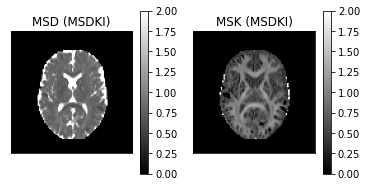

In [1]:
# Import relevant tools
import numpy as np
import matplotlib.pyplot as plt
import dipy.reconst.msdki as msdki
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti
from dipy.segment.mask import median_otsu

# Load the data
fraw, fbval, fbvec, t1_fname = get_fnames('cfin_multib')
data, affine = load_nifti(fraw)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

# Mask the data
maskdata, mask = median_otsu(data, vol_idx=[0, 1], median_radius=4, numpass=2,
                             autocrop=False, dilate=1)

# Fit the data
msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(data, mask=mask)

# Plot MSDI and MSKI
MSD = msdki_fit.msd
MSK = msdki_fit.msk

axial_slice = 9

fig2, ax = plt.subplots(1, 2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.01, wspace=0.2)

im0 = ax.flat[0].imshow(MSD[:, :, axial_slice].T * 1000, cmap='gray',
                        vmin=0, vmax=2, origin='lower')
ax.flat[0].set_title('MSD (MSDKI)')

im1 = ax.flat[1].imshow(MSK[:, :, axial_slice].T, cmap='gray',
                        vmin=0, vmax=2, origin='lower')
ax.flat[1].set_title('MSK (MSDKI)')

fig2.colorbar(im0, ax=ax.flat[0])
fig2.colorbar(im1, ax=ax.flat[1])

plt.show()

The axonal volume fraction (f), the intrisic diffusivity (di), and the microscopic anisotropy (uFA) can be directly extracted from "msdki_fit" object in the following way:

In [2]:
F = msdki_fit.smt2f
DI = msdki_fit.smt2di
uFA2 = msdki_fit.smt2uFA

The SMT2 model parameters extracted from MSDKI are displayed bellow:

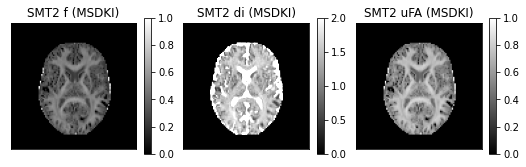

In [3]:
fig3, ax = plt.subplots(1, 3, figsize=(9, 2.5),
                        subplot_kw={'xticks': [], 'yticks': []})

fig3.subplots_adjust(hspace=0.4, wspace=0.1)

im0 = ax.flat[0].imshow(F[:, :, axial_slice].T,
                        cmap='gray', vmin=0, vmax=1, origin='lower')
ax.flat[0].set_title('SMT2 f (MSDKI)')

im1 = ax.flat[1].imshow(DI[:, :, axial_slice].T * 1000, cmap='gray',
                        vmin=0, vmax=2, origin='lower')
ax.flat[1].set_title('SMT2 di (MSDKI)')

im2 = ax.flat[2].imshow(uFA2[:, :, axial_slice].T, cmap='gray',
                        vmin=0, vmax=1, origin='lower')
ax.flat[2].set_title('SMT2 uFA (MSDKI)')

fig3.colorbar(im0, ax=ax.flat[0])
fig3.colorbar(im1, ax=ax.flat[1])
fig3.colorbar(im2, ax=ax.flat[2])


plt.show()
fig3.savefig('MSDKI_SMT2_invivo.png')

The similar contrast of SMT2 f-parameter maps in comparison to MSK (see previous figure) confirms than MSK and F captures the same tissue information but on different scales (now rescaled to values between 0 and 1). It is important to note that SMT model parameters estimates should be used with care, because the SMT model was shown to be invalid [NetoHe2019](https://pubmed.ncbi.nlm.nih.gov/30648753/). For instance, although SMT2 parameter f and uFA may be a useful normalization of the degree of non-Gaussian diffusion (note than both metrics have a range between 0 and 1), these cannot be interpreted as a real biophysical estimates of axonal water fraction and tissue microscopic anisotropy.